# Homework (15 pts) - Linear Regression

In [12]:
from sklearn import datasets

dataset = datasets.load_wine()

---
1. (1 pt) Extract the feature data matrix and target data vector as a numpy arrays to the variables X and y, respectively.

In [16]:
X = dataset.data
y = dataset.target

---
2. (1 pt) For visualization purposes only, load the feature data matrix X into a pandas dataframe and name the columns by the feature names in the dataset.

In [17]:
import pandas as pd

df = pd.DataFrame(X, columns = dataset.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


---
3. (1 pt) To get an overall sense of your feature data, use seaborn's `pairplot` function to plot the feature data histograms and correlations.

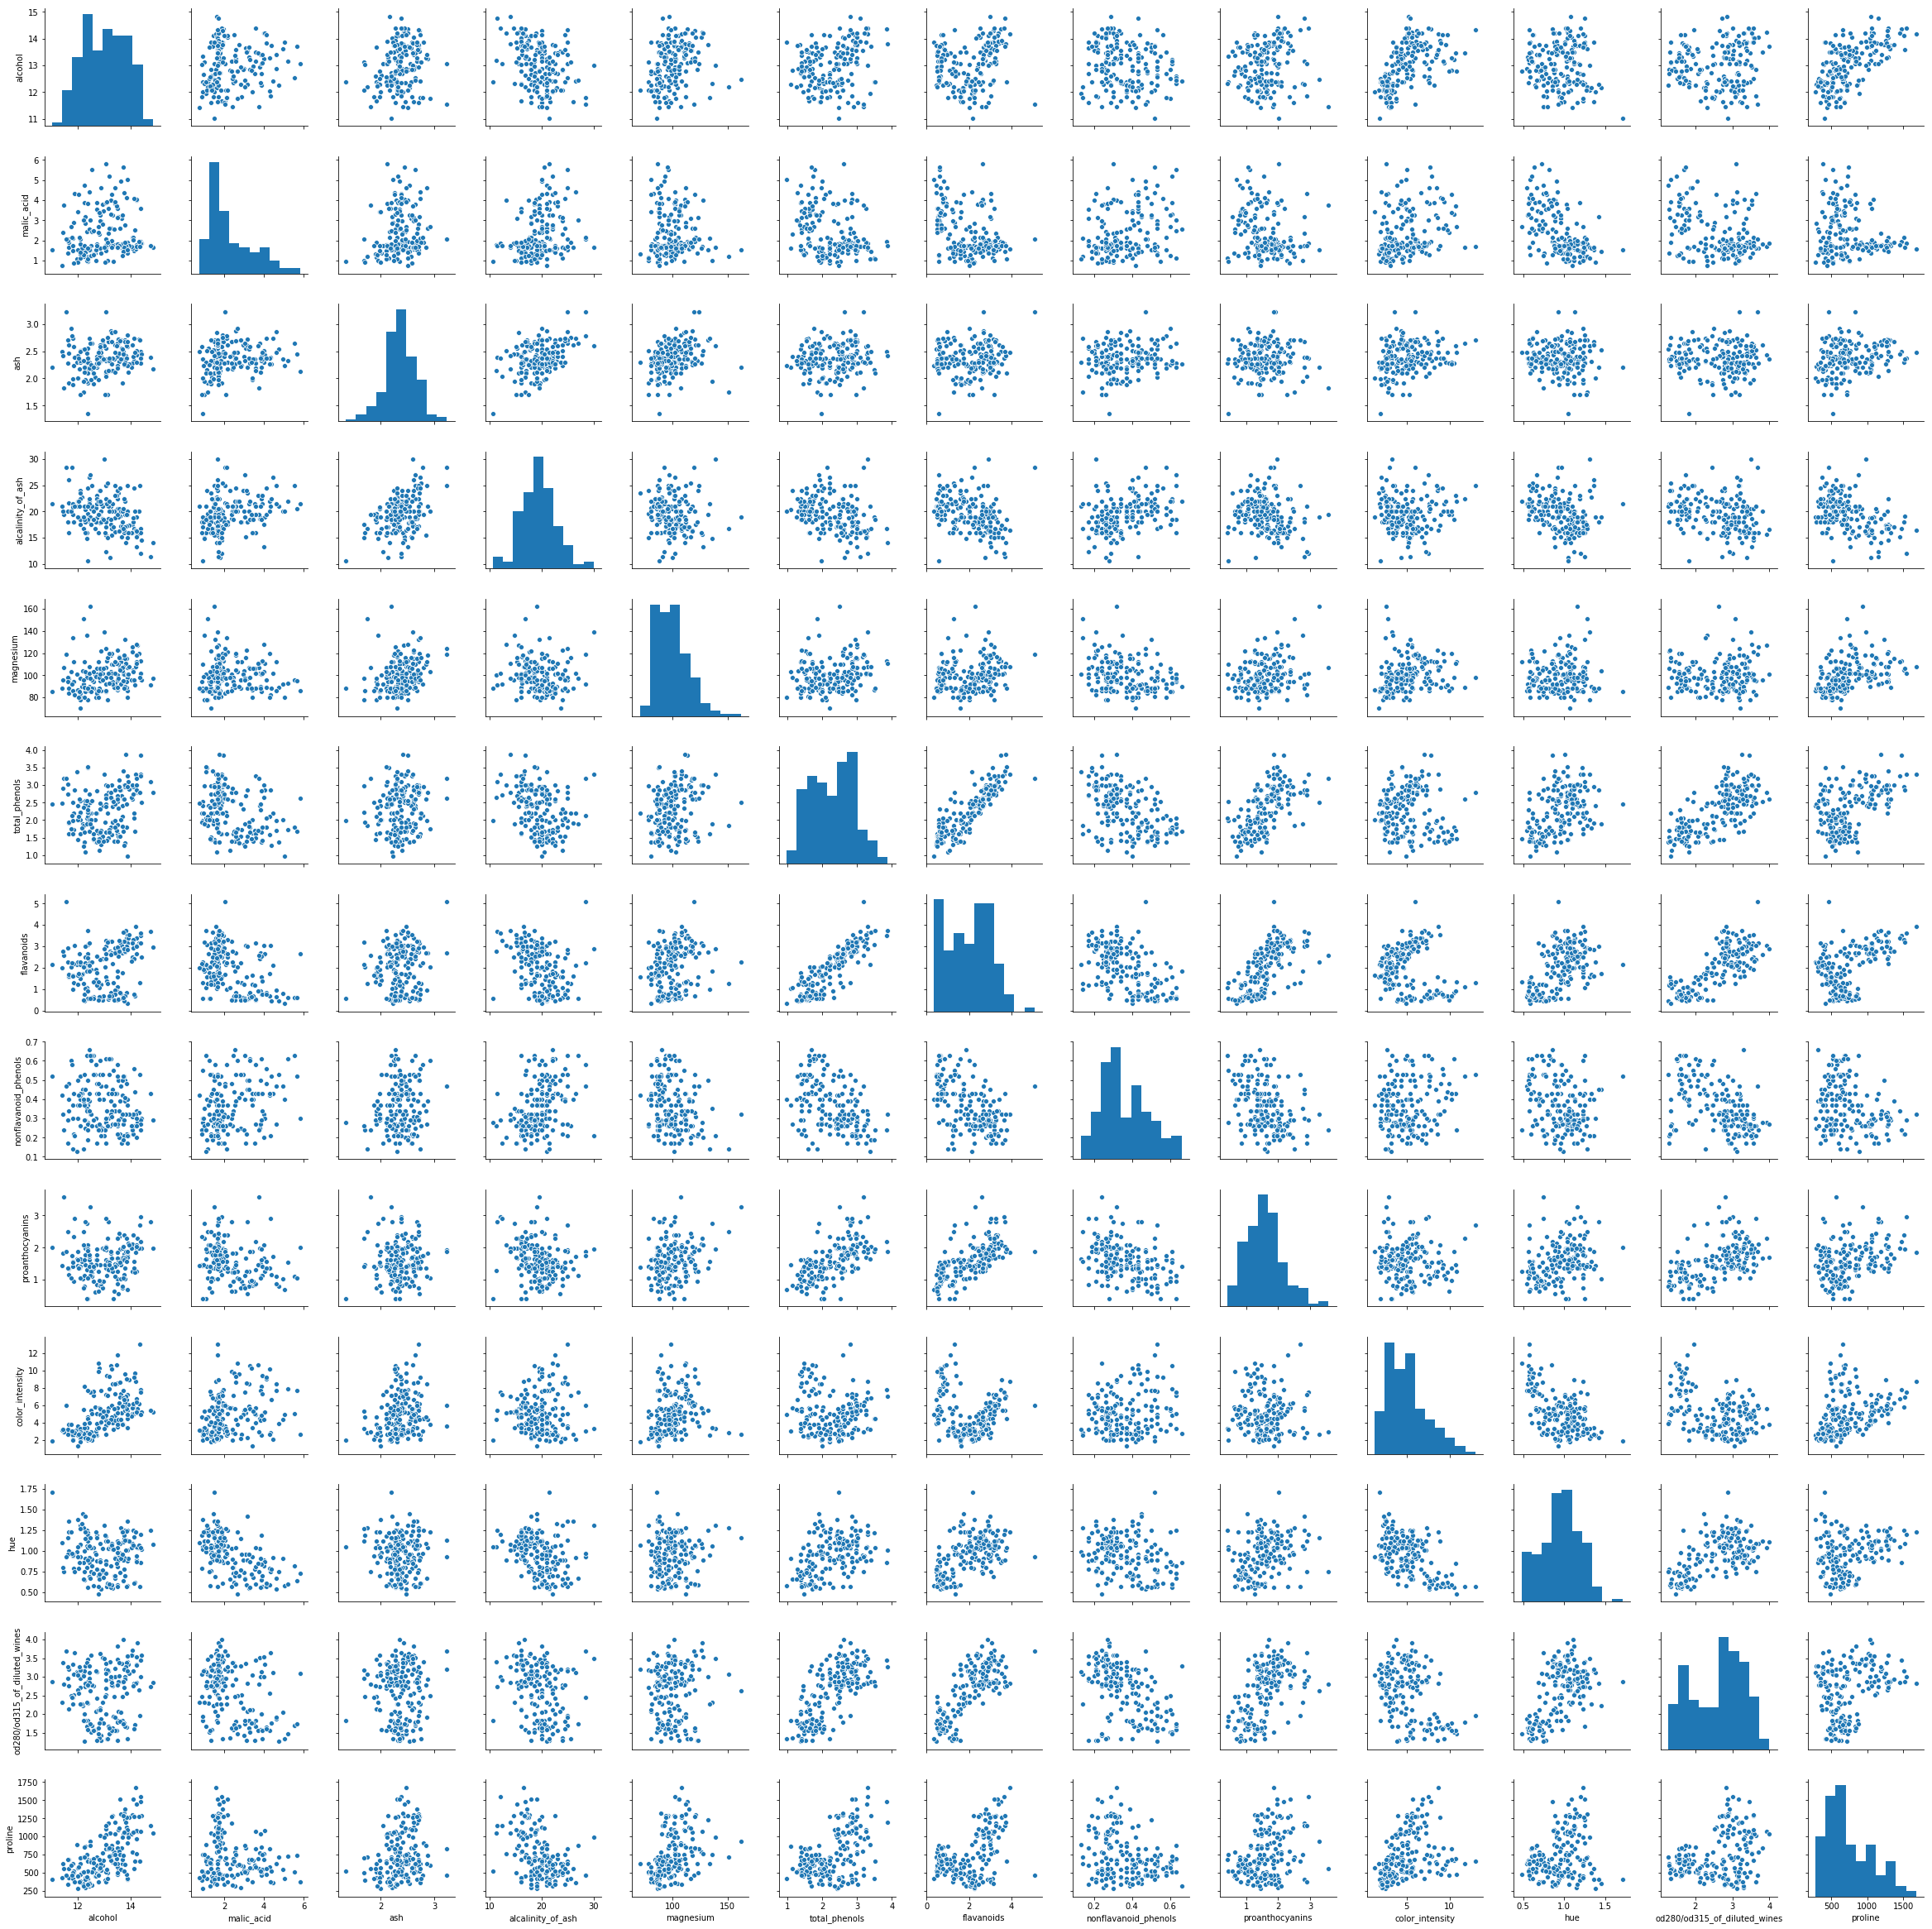

In [19]:
import seaborn as sns

sns.pairplot(df);

---
4. (3 pts) Standardize the feature data (each column of X) and the target data (y) by centering them on their mean and normalizing their variance.

In [20]:
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

y = y - y.mean()
y = y / y.std()

---
5. (3 pts) Fit a simple OLS linear regression model to the entire standardized dataset. Should you use a y-intercept or not?

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y);

---
6. (3 pt) Show a bar plot of the model coefficients (weights) for each feature. Put the feature names on the x-axis. Rotate the x-axis labels by 45 degrees and right-align them for visibility.

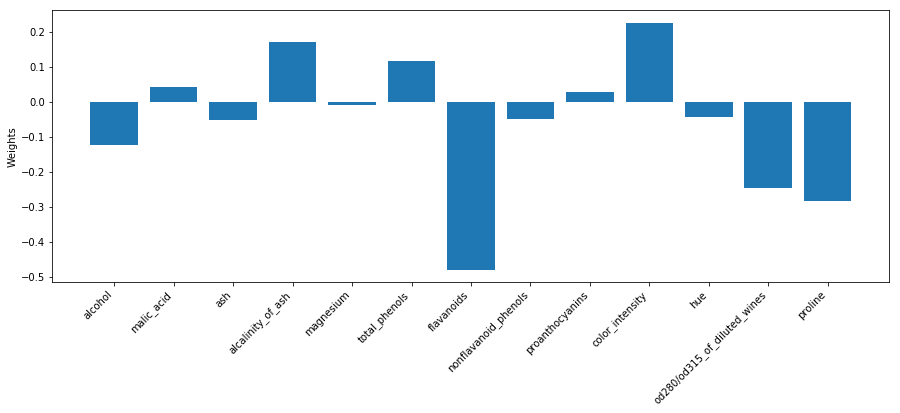

In [28]:
import matplotlib.pyplot as plt

nfeatures = X.shape[1]
plt.figure(figsize=(15, 5))
plt.bar(range(nfeatures), model.coef_)
plt.xticks(range(nfeatures), dataset.feature_names, rotation=45, ha='right')
plt.ylabel('Weights');

---
7. (3 pts) Use statsmodels to perform the same linear regression as above. Plot the model's coefficients (weights) as above but add errorbars for the 95% confidence interval of each coefficient.

In [29]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              114.3
Date:                Fri, 17 Apr 2020   Prob (F-statistic):                    2.47e-75
Time:                        09:24:19   Log-Likelihood:                         -47.562
No. Observations:                 178   AIC:                                      121.1
Df Residuals:                     165   BIC:                                      162.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1226      0.039     -3.175      0.002      -0.199      -0.046
x2             0.0435      0.032      1.373      0.172      -0.019       0.106
x3            -0.0526      0.036     -1.445      0.150      -0.124       0.019
x4             0.1717      0.037      4.664      0.000       0.099       0.244
x5            -0.0090      0.029     -0.308      0.758      -0.067       0.049
x6             0.1165      0.051      2.275      0.024       0.015       0.218
x7            -0.4799      0.065     -7.356      0.000      -0.609      -0.351
x8            -0.0487      0.033     -1.478      0.141      -0.114       0.016
x9             0.0291      0.035      0.840      0.402      -0.039       0.097
x10            0.2262      0.043      5.284      0.000       0.142       0.311
x11           -0.0440      0.039     -1.120      0.264      -0.122       0.034
x12           -0.2474      0.048     -5.167      0.000      -0.342      -0.153
x13           -0.2849      0.041     -6.889      0.000      -0.367      -0.203
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.607
Skew:                           0.142   Prob(JB):                        0.738
Kurtosis:                       2.975   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
ci = results.conf_int(alpha=0.05)

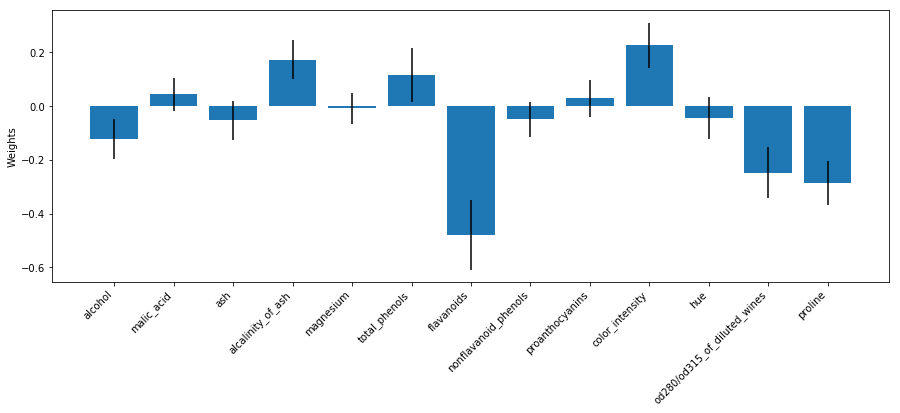

In [31]:
below = results.params - ci[:,0]
above = ci[:,1] - results.params

nfeatures = X.shape[1]
plt.figure(figsize=(15, 5))
plt.bar(range(nfeatures), results.params, yerr=[below, above])
plt.xticks(range(nfeatures), dataset.feature_names, rotation=45, ha='right')
plt.ylabel('Weights');